<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Projects_and_Labs/blob/main/FFML_Module_09%2CLAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT

FMML Module 09, Lab 03 <br>
 NAME: Grishma Yenchilwar ( grishma.yenchilwar.cse@ghrce.raisoni.net ) <br>
 Date: 23 Apr 2024 <br>

 Module 9: Convolutional Neural Networks<br>
 Lab 3<br>
 Module coordinator: Kushagra Agarwal<br>

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

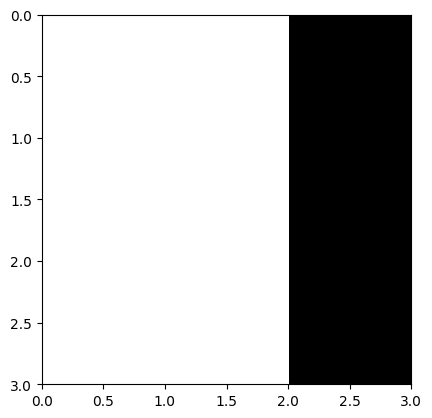

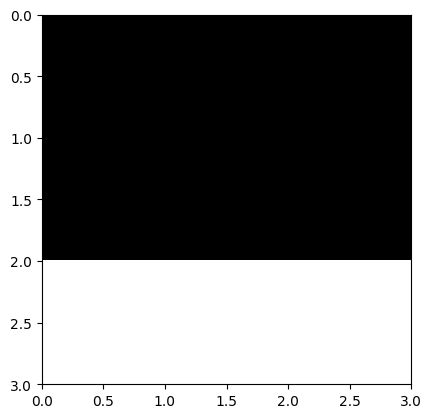

In [ ]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [ ]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [ ]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [ ]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [ ]:
# Our original lotus image
image = cv2.imread('/content/grid1.jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

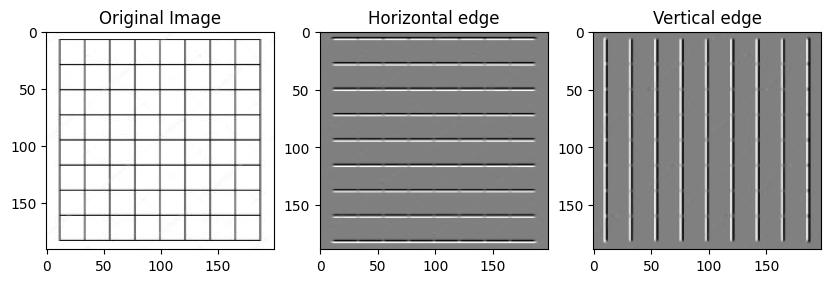

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [ ]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 43291927.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [ ]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [ ]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [ ]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0130, Accuracy: 38.4480
Epoch 2/5, Loss: 0.0094, Accuracy: 57.0060
Epoch 3/5, Loss: 0.0078, Accuracy: 64.8860
Epoch 4/5, Loss: 0.0068, Accuracy: 69.9060
Epoch 5/5, Loss: 0.0058, Accuracy: 73.7520


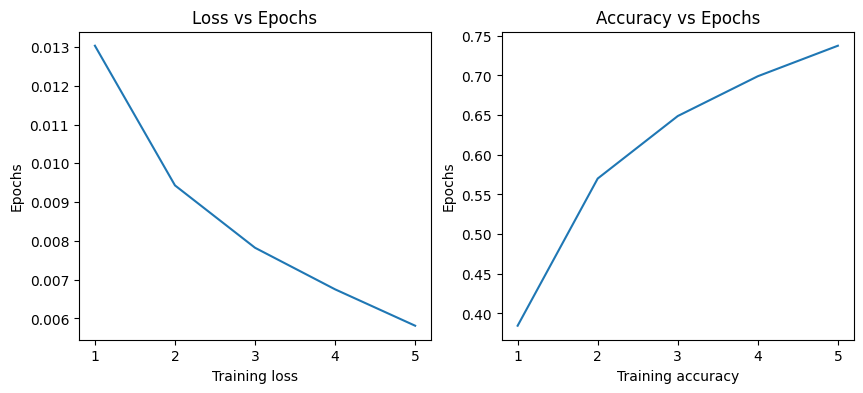

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [ ]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


1) Using Convolutional Neural Networks (CNNs) over regular Artificial Neural Networks (ANNs) for image classification offers several advantages:

1. **Hierarchical Feature Learning**: CNNs are specifically designed to learn hierarchical representations of data. In image classification tasks, CNNs can automatically learn meaningful features directly from raw pixel values, such as edges, textures, and patterns, without requiring handcrafted feature extraction. This hierarchical feature learning capability is crucial for capturing the complex structures present in images.

2. **Spatial Invariance**: CNNs exploit the spatial structure of images through convolutional layers, which apply filters across different spatial locations. This property allows CNNs to learn features that are invariant to small translations, rotations, and distortions in the input image. Thus, CNNs are well-suited for tasks where the spatial relationships between pixels are important, such as image classification.

3. **Parameter Sharing**: CNNs share parameters across different spatial locations within each convolutional layer. This parameter sharing significantly reduces the number of parameters compared to fully connected ANNs, making CNNs more computationally efficient and easier to train, especially for large images.

4. **Local Connectivity**: CNNs enforce local connectivity by connecting each neuron in a convolutional layer only to a small local region of the input volume. This local connectivity helps CNNs capture local patterns and spatial dependencies efficiently while reducing the computational burden.

5. **Pooling Layers**: CNNs typically incorporate pooling layers, such as max pooling or average pooling, which downsample the feature maps while preserving the most important information. Pooling layers help to reduce the spatial dimensions of the feature maps, making the network more robust to variations in the input and reducing the risk of overfitting.

6. **Weight Sharing**: CNNs leverage weight sharing across different parts of the input image, which encourages the network to learn generic features that are useful across different spatial locations. This weight sharing helps CNNs generalize better to unseen data and improves their ability to extract meaningful features.

7. **State-of-the-Art Performance**: CNNs have consistently achieved state-of-the-art performance in various image classification benchmarks, surpassing the performance of traditional machine learning algorithms and ANNs. Their effectiveness in handling complex visual data has made CNNs the go-to choice for image classification tasks.



2) To improve the performance of a CNN model for image classification, we can experiment with various hyperparameters such as the number of epochs, choice of optimizer, learning rate, batch size, and regularization techniques. Here's a general approach to tuning these hyperparameters:

1. **Number of Epochs**: Increase or decrease the number of training epochs to find the optimal balance between underfitting and overfitting. If the model is underfitting, training for more epochs might improve performance, but if it's overfitting, reducing the number of epochs or applying early stopping might be necessary.

2. **Optimizer**: Experiment with different optimizers such as SGD, Adam, RMSprop, etc., to find the one that works best for your dataset and model architecture. Each optimizer has its own advantages and may perform differently depending on the task.

3. **Learning Rate (LR)**: Adjust the learning rate to control the step size during optimization. Too high of a learning rate might cause the model to overshoot the optimal solution, while too low of a learning rate might slow down training or cause the model to get stuck in local minima. Learning rate schedules or adaptive learning rate techniques like learning rate decay can also be used.

4. **Batch Size**: The batch size affects the stability of training and the speed of convergence. Smaller batch sizes provide more noise in the parameter updates but may generalize better, while larger batch sizes lead to smoother gradients but might cause the model to converge to a suboptimal solution. Experiment with different batch sizes to find the optimal one.

5. **Regularization**: Apply regularization techniques such as dropout, L1/L2 regularization, or batch normalization to prevent overfitting and improve generalization performance.

6. **Model Architecture**: Experiment with different CNN architectures, such as varying the number of layers, filter sizes, and number of filters per layer. Sometimes a deeper or wider network might capture more complex features and improve performance.



3) Reducing the number of convolutional layers to only one in a convolutional neural network (CNN) can have several implications, both positive and negative, depending on the complexity of the dataset and the task at hand. Here are some potential consequences:

1. **Simplification of Model**: With only one convolutional layer, the model becomes much simpler compared to deeper architectures. This can lead to faster training times and reduced computational complexity, which may be advantageous for simpler datasets or resource-constrained environments.

2. **Limited Feature Extraction**: One convolutional layer might not be sufficient to capture complex hierarchical features in the data. Deeper architectures with multiple convolutional layers can learn increasingly abstract and high-level representations of the input data, which can be beneficial for tasks requiring nuanced feature extraction, such as object recognition in images.

3. **Reduced Capacity**: A single convolutional layer has limited capacity to model the intricacies of the data distribution. This can lead to underfitting, where the model fails to capture important patterns and relationships in the data, resulting in suboptimal performance, especially on more complex datasets.

4. **Loss of Spatial Hierarchies**: Deep CNNs are designed to capture spatial hierarchies of features in the input data, starting from low-level features like edges and textures and progressing to higher-level concepts like object parts and semantic information. With only one convolutional layer, the model may struggle to learn such hierarchical representations effectively.

5. **Limited Flexibility**: Deeper architectures allow for more flexibility in learning complex relationships and patterns in the data. With only one convolutional layer, the model's capacity to adapt to diverse datasets and tasks is limited, potentially leading to reduced generalization performance.


4) In the context of CNNs for image classification, the Softmax activation function is commonly used in the output layer to generate probability distributions over multiple classes. However, it's important to note that the choice of activation function in the output layer depends on the nature of the task and the loss function being used.

Here are a few reasons why Softmax activation may not always be used in the last layer of a CNN:

1. **Choice of Loss Function**: The choice of activation function in the output layer is often tied to the choice of loss function. For multi-class classification tasks, where the goal is to predict the probability of each class, the categorical cross-entropy loss function is commonly used. Softmax activation is typically paired with categorical cross-entropy loss to compute the difference between predicted probabilities and true labels.

2. **Binary Classification**: In some cases, the task may involve binary classification, where the goal is to predict whether an input belongs to one of two classes. In such scenarios, the output layer typically consists of a single neuron with a sigmoid activation function, which produces a probability value between 0 and 1, indicating the likelihood of belonging to the positive class.

3. **Intermediate Layers**: CNNs often include multiple layers with activation functions such as ReLU or similar functions to introduce non-linearity and capture complex patterns in the data. Softmax activation is typically used in the output layer, but intermediate layers may use different activation functions depending on the desired properties of the network.

4. **Normalization**: Softmax activation normalizes the output scores into a probability distribution, ensuring that the predicted probabilities sum up to 1. While this is useful for multi-class classification tasks, it may not be necessary or desirable for other tasks, such as regression or object detection.

5. **Custom Output Layers**: In some cases, custom output layers may be used based on the specific requirements of the task. For example, in object detection tasks, the output layer may consist of multiple neurons corresponding to different object classes, each with its own activation function and loss function.
